[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/prokaj/elte-python-2023/blob/main/2023-11-13.ipynb)   

Néhány import amit később használni fogunk:

In [105]:
import importlib
import math
import graphviz

if importlib.util.find_spec('ipytest') is None:
    ! pip install --quiet ipytest

import ipytest

ipytest.autoconfig()

# Házi feladat

Írjunk egy `Permutation` nevű osztályt, aminek segítségével permutációkkal számolhatunk.
Egy permutáció egy $\pi:\{0,1,\dots,n-1\}\mapsto\{0,1,\dots,n−1\}$ kölcsönös egyeértelmű függvény (bijekció).
Szokásos megadása a $\pi(0),\dots,\pi(n−1)$ sorozattal történik.

Két permutáció szorzata alatt értsük a kompozíciójukat. Erre nézve az egységelem az identikus permutáció. Így egy permutációnak van inverze és két permutációt szorozni és osztani is lehet egymással. A hatványozás is értelmezett egész kitevőkre.

A Permutation osztály implementálja ezeket a műveleteket, valamint az `__str__` és `__repr__` metódusokat is. Az egyes műveletekhez tartozó ,,dunder” metódusok:

- `*`: `__mul__`

- `~` (inverz): `__invert__`

- `/`: `__truediv__`

- `**`: `__pow__`

Pl.

```python
pi = Permutation([2, 0, 1, 3])
for i in range(-2, 3):
   pi0 = pi**i
   print(
      f"{i=},\n\t"
      f"str(pi**{i})    = {pi0!s},\n\t"
      f"repr(pi**{i})   = {pi0!r}\n\t"
      f"str(~(pi**{i})) = {~pi0!s}"
      )
```

eredménye:

```python
i=-2,
    str(pi**-2)    = (2, 0, 1, 3),
    repr(pi**-2)   = Permutation((2, 0, 1, 3))
    str(~(pi**-2)) = (1, 2, 0, 3)
i=-1,
    str(pi**-1)    = (1, 2, 0, 3),
    repr(pi**-1)   = Permutation((1, 2, 0, 3))
    str(~(pi**-1)) = (2, 0, 1, 3)
i=0,
    str(pi**0)    = (0, 1, 2, 3),
    repr(pi**0)   = Permutation((0, 1, 2, 3))
    str(~(pi**0)) = (0, 1, 2, 3)
i=1,
    str(pi**1)    = (2, 0, 1, 3),
    repr(pi**1)   = Permutation((2, 0, 1, 3))
    str(~(pi**1)) = (1, 2, 0, 3)
i=2,
    str(pi**2)    = (1, 2, 0, 3),
    repr(pi**2)   = Permutation((1, 2, 0, 3))
    str(~(pi**2)) = (2, 0, 1, 3)
```

Az `__init__`` metódus dobjon (raise statement) `TypeError` hibát, ha a bemenet nem sorozat és `ValueError` hibát, ha ugyan sorozat de nem permutáció.

Nem kell túlbonyolítani. Ha perm az argumentum, akkor pl. `tuple(perm)` típus hibára vezet, ha `perm` nem egy sorozat! Egy sorozat permutációt ír le, ha az elemeinek halmaza {0,1…,n−1}, ahol n a sorozat hossza.

Írjunk teszteket. Ellenőrizzük az implementált metódusokat. Az `__init__` metódusnál azt is, hogy hibát dob-e ha az argumentum nem megfelelő. Ehhez importálni kell a `pytest` modulból a `raises` függvényt és gyakorlaton látottaknak megfelelően alkalmazni.

Extra 5 pontért implementáljuk a `_repr_svg_` metódust is. Ennek hatására, jupyter-es környezetben, pl. Colab-on, a permutáció egy gráfként ábrázolva jelenjen meg. Tegyük fel, hogy a permutáció $\pi =(\pi(0),\dots,\pi(n-1))$
A $\pi$-hez tartozó gráf írányított, csúcsai a $0,\dots,n-1$ számok és $a$-ból $b$-be pontosan akkor megy él, ha $\pi(a)=b$.

Az implementációhoz használjuk a `graphviz` modult. Nézzünk utána, hogy lehet egy írányított gráfot (`graphviz.Digraph`)
létrehozni és abból hogyan lehet előbányászni az őt leíró `svg` sztringet. A `_repr_svg_` metódusnak ezt a sztringet kell visszaadnia!


In [108]:
(1, 2) == (1.0, float(2))

True

In [111]:
class Permutation:
    def __init__(self, perm):
        try:
            self.perm = tuple(perm)
        except TypeError:
            raise TypeError("not sequence")
        if sorted(self.perm) != list(range(len(self.perm))):
            raise ValueError("not permutation")


    def __mul__(self, other):
        return Permutation(self.perm[a] for a in other.perm)


    def __truediv__(self, other):
        return self * (~other)

    def __invert__(self):
        inv = [0]*len(self.perm)
        for a, b in enumerate(self.perm):
            inv[b] = a
        return Permutation(inv)

        # return Permutation(self.perm.index(i) for i in range(len(self.perm)))

    def __pow__(self, n):
        result = Permutation(range(len(self.perm)))
        for _ in range(abs(n)):
            result *= self
        return result if n >= 0 else ~result

    def __str__(self):
        return str(self.perm)

    def __repr__(self):
        return f"{type(self).__name__}({self.perm})"

    def _repr_svg_(self):
        graph = graphviz.Digraph()
        graph.edges((str(a), str(b)) for a, b in enumerate(self.perm))
        return graph._repr_image_svg_xml()


    def __eq__(self, other):
        return isinstance(other, type(self)) and other.perm==self.perm

In [113]:
%%ipytest
from pytest import raises
import json
import itertools

def test_init():
    with raises(TypeError):
        Permutation(1)

    with raises(ValueError):
        Permutation("abc")

    with raises(ValueError):
        Permutation((1, 2))

    with raises(ValueError):
        Permutation((0, 0.2))

    assert Permutation((0,1,2,3)).perm == (0,1,2,3)

    seq = [0, 1, 2]
    p = Permutation(seq)
    seq[0] = 4
    assert p.perm == (0, 1, 2)

def test_mul():
    p = Permutation((1, 2, 0, 3, 4))
    assert p*p == Permutation((2, 0, 1, 3, 4))


def test_div():
    p = Permutation((1, 2, 0, 3, 4))
    q = Permutation((0, 1, 2, 4, 3))
    assert p/q == Permutation((1, 2, 0, 4, 3))

def test_inv():
    identity = Permutation(range(5))
    for p in itertools.permutations(range(5)):
        pi = Permutation(p)
        assert pi*(~pi) == identity

def test_str():
    identity = Permutation(range(5))
    assert str(identity) == "(0, 1, 2, 3, 4)"

    p = Permutation((1, 2, 0, 3, 4))
    assert str(p) == "(1, 2, 0, 3, 4)"


def test_repr():
    identity = Permutation(range(5))
    assert repr(identity) == "Permutation((0, 1, 2, 3, 4))"

    p = Permutation((1, 2, 0, 3, 4))
    assert repr(p) == "Permutation((1, 2, 0, 3, 4))"

def test_svg():
    with open("data/snapshot.json", "r") as file:
        examples = json.load(file)
    for example in examples:
        seq = example['permutation']
        svg = example['svg_string']
        pi = Permutation(seq)
        assert pi._repr_svg_() == svg


.......                                                                                      [100%]
7 passed in 0.07s


## Snapshot létrehozása

In [ ]:
from pathlib import Path

snapshot_file = Path("data") / "snapshot.json"

if not snapshot_file.exists():
    snapshot = [
        {
            "permutation": p,
            "svg_string": Permutation(p)._repr_svg_()
        }
        for p in [(0, 1, 2, 3, 4),  (1, 2, 0)]
    ]
    with open(snapshot_file, "w") as file:
        json.dump(snapshot, file, indent=2)

    print(f"snapshot is written into {snapshot_file.absolute()}")


snapshot is written into /content/data/snapshot.json


In [114]:
!cat data/snapshot.json

[
  {
    "permutation": [
      0,
      1,
      2,
      3,
      4
    ],
    "svg_string": "<?xml version=\"1.0\" encoding=\"UTF-8\" standalone=\"no\"?>\n<!DOCTYPE svg PUBLIC \"-//W3C//DTD SVG 1.1//EN\"\n \"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd\">\n<!-- Generated by graphviz version 2.43.0 (0)\n -->\n<!-- Title: %3 Pages: 1 -->\n<svg width=\"440pt\" height=\"44pt\"\n viewBox=\"0.00 0.00 440.00 44.00\" xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\">\n<g id=\"graph0\" class=\"graph\" transform=\"scale(1 1) rotate(0) translate(4 40)\">\n<title>%3</title>\n<polygon fill=\"white\" stroke=\"transparent\" points=\"-4,4 -4,-40 436,-40 436,4 -4,4\"/>\n<!-- 0 -->\n<g id=\"node1\" class=\"node\">\n<title>0</title>\n<ellipse fill=\"none\" stroke=\"black\" cx=\"27\" cy=\"-18\" rx=\"27\" ry=\"18\"/>\n<text text-anchor=\"middle\" x=\"27\" y=\"-14.3\" font-family=\"Times,serif\" font-size=\"14.00\">0</text>\n</g>\n<!-- 0&#45;&gt;0 -->\n<g id=\"edge1\"

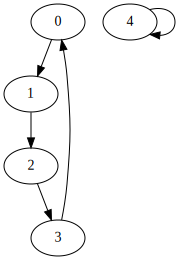

In [117]:
pi = Permutation((1,2,3,0,4))
pi

## Szorgalmi feladat.

Harmonikus sor alatt, az $\sum_{n=1}^\infty
  \frac1n$ sort értjük. Ennek a részletösszegeit szeretnénk kiszámítani
legalább $10^{-8}$ pontossággal. Ehhez használhatnánk, a definíciót:

```python
def harmonic_sum_slow(n: int) -> float:
    return sum(1/k for k in reversed(range(1, n+1)))
```

azonban ez túlságosan lassú. A művelet igény lineáris $n$-ben és
körülbelül $n=25*10^6$ esetén már egy másodperc körüli a futási idő.

A kiindulást a következő ötlet szolgáltathatja, $n\geq 1$-re:
$$
\begin{aligned}
    \log\left({n+\frac12}\right) - \log\left({n-\frac12}\right)
    &=\int_{n-\frac1{2}}^{n+\frac1{2}} \frac1{x} dx\\
    &= \int_{-\frac1{2}}^{\frac1{2}} \frac1{n+x} dx\\
    & = \frac1n +\int_{-\frac1{2}}^{\frac1{2}} \frac1{(n+x)}
      -\frac1ndx\\
    & = \frac1n +\int_{-\frac1{2}}^{\frac1{2}} \frac{x}{(n+x)n}dx\\
    & = \frac1n +\int_{0}^{\frac1{2}} \frac{2x^2}{(n^2-x^2)n}dx    
\end{aligned}
$$ Ebből becsüljük meg $\frac1n$ és a bal oldal eltérését.
Végül az összeg első néhány tagját megtartva, a többit közelítve a
logaritmus megváltozásával próbáljunk gyorsabb és az előírt pontosságú
módszert találni.

Egy másik lehetőség $1/n+1/(n+1)$ és $2\log(1+1/n)$ összehasonlítása.

In [120]:
def harmonic_sum_slow(n: int) -> float:
    return math.fsum(1/k for k in range(1, n+1))

In [ ]:
%%time
harmonic_sum_slow((10**8))

CPU times: user 7.2 s, sys: 13.4 ms, total: 7.21 s
Wall time: 7.77 s


18.997896413853898

A megadott formula alapján
$$
\begin{aligned}
\left|\frac1n - \int_{n-1/2}^{n+1/2} \frac1{x}dx\right|
&= \int_0^{1/2} \frac{2x^2}{(n^2-x^2)n}dx\\
&\leq \frac1{(n^2-1)n}\int_0^{1/2} 2x^2dx=\frac1{12(n^2-1)n}
\end{aligned}
$$
Ha $n_0$-tól összegzünk, akkor
$$
\begin{aligned}
\sum_{n=n_0}^\infty \frac1{(n^2-1)n}& =
\sum_{n=n_0}^\infty \frac1{(n-1)(n+1)n}\\
&= \frac12\sum_{n=n_0}^\infty \frac1{n-1}+\frac1{n+1} -\frac{2}{n}\\
&=\frac12\left\{\sum_{n=n_0-1}\frac{1}{n}+\sum_{n=n_0+1}\frac1n-2\sum_{n=n_0}\frac1n\right\}\\
&=\frac12\left\{\frac1{n_0-1}-\frac1{n_0}\right\}=\frac{1}{2n_0(n_0-1)}
\end{aligned}
$$

Ebből az adódik, hogy
$$
\left|\sum_{n=n_0}^{n_1} \frac1n - \log\left(\frac{n_1+1/2}{n_0-1/2}\right)\right|
\leq \frac{1}{24(n_0(n_0-1))}
$$

A logaritmus értékét pontosnak vehetjük, így a közelítés hibája akkor lesz kisebb, mint $10^{-8}$, ha
$$
    24*n_0(n_0-1)>10^8
$$

In [118]:
print(f"{((1e8)/24)**0.5=}")
n0 = 2500


((1e8)/24)**0.5=2041.241452319315


In [119]:
import math

def harmonic_sum_faster(n: int) -> float:
    n0 = min(n, 2500)
    return math.fsum(1/k for k in range(1, n0+1)) + math.log((n+0.5)/(n0+0.5))

In [121]:
%%ipytest

def test_hs():
    for n in range(1, 1000):
        assert harmonic_sum_slow(n) == harmonic_sum_faster(n)

    for n in range(5000, 100_001, 2_500):
        assert abs(harmonic_sum_slow(n)-harmonic_sum_faster(n))<1e-8

    for n in range(500_000, 1_000_001, 50_000):
        assert abs(harmonic_sum_slow(n)-harmonic_sum_faster(n))<1e-8


.                                                                                            [100%]
1 passed in 0.66s


In [ ]:
%%time
harmonic_sum_faster((10**8))

CPU times: user 280 µs, sys: 0 ns, total: 280 µs
Wall time: 285 µs


18.997896420517897

In [125]:
class A:
    def __init__(self, seq):
        self.seq = list(seq)

    def __getitem__(self, idx):
        return self.seq[idx]

    def __setitem__(self, idx, value):
        self.seq[idx] = value

    def __len__(self):
        return len(self.seq)

    def __repr__(self):
        return str(self.seq)



In [127]:
a = A((1,2,3))
a[0] = 4
a


[4, 2, 3]

# Dekorátorok

Egy függvényből egy másikat állít elő.

Szintakszis:

```python
@dekorator
def f():
    pass
```
kb. ekvivalens azzal, hogy

```python
def f():
    pass

f = dekorator(f)
```

In [128]:
def show_funcall(fun):
    def f(*args):
        print(f"call: {fun.__name__}({', '.join(map(str, args))})")
        result = fun(*args)
        print(f"      {result=}")
        return result
    return f

In [131]:
###@show_funcall
def sum_values(a: int, b: int) -> int:
    """adds two integer"""
    return a+b

sum_values(1, 1)

2

In [132]:
help(sum_values)

Help on function sum_values in module __main__:

sum_values(a: int, b: int) -> int
    adds two integer



# Property dekorátor

Előadáson a `property` dekorátor szerepelt. Erre szeretnénk megnézni egy példát.

In [133]:
class Temperature:
    def __init__(self, celsius=0):
        ## Valójában a self.temperature attributomot állítja be ellenőrzés mellett!
        self.celsius = celsius

    @property
    def fahrenheit(self):
        return 32+9*self.temperature/5

    @fahrenheit.setter
    def fahrenheit(self, fahrenheit):
        self.celsius = (fahrenheit-32)*5/9

    @property
    def celsius(self):
        return self.temperature

    @celsius.setter
    def celsius(self, celsius):
        if celsius < -273:
            raise ValueError('Temperature is too small')
        self.temperature = celsius

    def __str__(self):
        return f"{self.celsius:.1f} \u2103 ({self.fahrenheit:.1f} \u2109)"

    def __repr__(self):
        return f"{type(self).__name__}({self.celsius})"



In [134]:
%%ipytest
from pytest import raises

def test_T():
    t = Temperature(25)
    assert t.celsius == 25
    assert t.fahrenheit == 9*5+32

    with raises(ValueError):
        Temperature(-300)

.                                                                                            [100%]
1 passed in 0.01s


Példák.

In [136]:
temp = Temperature()

for t in range(-20, 45, 5):
    temp.celsius = t
    print(str(temp))

for t in range(-20, 45, 5):
    temp.fahrenheit = t
    print(str(temp))


-20.0 ℃ (-4.0 ℉)
-15.0 ℃ (5.0 ℉)
-10.0 ℃ (14.0 ℉)
-5.0 ℃ (23.0 ℉)
0.0 ℃ (32.0 ℉)
5.0 ℃ (41.0 ℉)
10.0 ℃ (50.0 ℉)
15.0 ℃ (59.0 ℉)
20.0 ℃ (68.0 ℉)
25.0 ℃ (77.0 ℉)
30.0 ℃ (86.0 ℉)
35.0 ℃ (95.0 ℉)
40.0 ℃ (104.0 ℉)
-28.9 ℃ (-20.0 ℉)
-26.1 ℃ (-15.0 ℉)
-23.3 ℃ (-10.0 ℉)
-20.6 ℃ (-5.0 ℉)
-17.8 ℃ (0.0 ℉)
-15.0 ℃ (5.0 ℉)
-12.2 ℃ (10.0 ℉)
-9.4 ℃ (15.0 ℉)
-6.7 ℃ (20.0 ℉)
-3.9 ℃ (25.0 ℉)
-1.1 ℃ (30.0 ℉)
1.7 ℃ (35.0 ℉)
4.4 ℃ (40.0 ℉)


In [137]:
temp.__dict__

{'temperature': 4.444444444444445}

In [138]:
type(temp).__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.Temperature.__init__(self, celsius=0)>,
              'fahrenheit': <property at 0x7af33d1f1b20>,
              'celsius': <property at 0x7af33d1f2bb0>,
              '__str__': <function __main__.Temperature.__str__(self)>,
              '__repr__': <function __main__.Temperature.__repr__(self)>,
              '__dict__': <attribute '__dict__' of 'Temperature' objects>,
              '__weakref__': <attribute '__weakref__' of 'Temperature' objects>,
              '__doc__': None})

In [139]:
type(temp).fahrenheit.fget


<function __main__.Temperature.fahrenheit(self)>

In [140]:
temp.fahrenheit = 100
print(temp)
temp

37.8 ℃ (100.0 ℉)


Temperature(37.77777777777778)

# További példák dekorátorokra



A `functools` modulban számos hasznos dekorátor található

- `lru_cache`: A függvényből a memorizált változatot készíti el.
- `partial`: `g = partial(f, 1)` hatására `g(...)` ugyanaz, mint `f(1, ...)`
- `wraps`: lásd a dokumentációt.

In [ ]:
from functools import lru_cache, partial, wraps

@lru_cache()
def f(x):
    return x*x

print(f(1), f(2), f(1))
print(f.cache_info())




1 4 1
CacheInfo(hits=1, misses=2, maxsize=128, currsize=2)


In [141]:
def add(a, b):
    return a+b

inc = partial(add, 1)
inc(10)


11

In [142]:
def decor_wo_wraps(f):
    def h(*args):
        print("decorated without wraps")
        return f(*args)
    return h

def decor_wraps(f):
    @wraps(f)
    def h(*args):
        print("decorated with wraps")
        return f(*args)
    return h


In [143]:
@decor_wo_wraps
def dummy_fn(a:int, b:int) -> int:
    """dummy fn. Nothing interesting"""
    return a+b

print(dummy_fn(1, 2))
help(dummy_fn)

decorated without wraps
3
Help on function h in module __main__:

h(*args)



In [144]:
@decor_wraps
def dummy_fn(a:int, b:int) ->int:
    """dummy fn. Nothing interesting"""
    return a+b

print(dummy_fn(1, 2))
help(dummy_fn)

decorated with wraps
3
Help on function dummy_fn in module __main__:

dummy_fn(a: int, b: int) -> int
    dummy fn. Nothing interesting



Kicsit jobb `show_fun`

In [ ]:
def show_funcall(fun):
    @wraps(fun)
    def f(*args):
        print(f"call: {fun.__name__}({', '.join(map(str, args))})")
        result = fun(*args)
        print(f"      {result=}")
        return result
    return f

In [ ]:
dbl_dummy_fn = show_funcall(dummy_fn)

In [ ]:
help(dbl_dummy_fn)

Help on function dummy_fn in module __main__:

dummy_fn(a: int, b: int) -> int
    dummy fn. Nothing interesting



In [ ]:
dbl_dummy_fn(1, 2)

call: dummy_fn(1, 2)
decorated with wraps
      result=3


3



# Feladat



Írjuk meg a `grep` program egyszerűsített változatát.

A `grep` soronként olvas egy szövegfileból és a megadott mintát tartalmazó sorokat kiírja a kimenetre.

Képes arra, hogy kiírja a mintát tartalmazó sorral együtt azt megelőző és azt követő néhány sort is.

A mi változatunk egy generátor függvény lesz, ami a megadott file soraiból azokat tartja meg, amik az adott mintát tartalmazzák.


## Olvasás fileból

```python
with open(filename, mode) as file:
    do_something with file
```
       
- `filename` a file elérési útja
- `mode`
  + `r` reading olvasás
  + `w` writing írás
  + `b` binary
  + `t` text
  + `a` append
  
  Ha nem adjuk meg `rt`.
  
  Lehetne még `r, w, rb, wb, a`  

In [145]:
%%writefile /tmp/test.txt
első sor
második sor
harmadik
utolsó

Overwriting /tmp/test.txt


In [146]:
filename = "/tmp/test.txt"

with open(filename, "r") as file:
    print(file)
    print(f"---{filename}:")
    for line in file:
        print(line, end="")
    print("---")


<_io.TextIOWrapper name='/tmp/test.txt' mode='r' encoding='UTF-8'>
---/tmp/test.txt:
első sor
második sor
harmadik
utolsó
---


Egészítsük ki a következő kódot!

In [160]:

def simple_grep(filename: str, pattern: str): # Generator[str]
    with open(filename, "r") as file:
        for line in file:
            if pattern in line.lower():
                yield line

In [150]:
list(simple_grep("/tmp/test.txt", "s"))

['első sor\n', 'második sor\n', 'utolsó\n']

### Adatok olvasása netről

Ez  megoldható `urllib.request` modullal


In [151]:
import urllib.request as request
import itertools

In [152]:

url = "https://www.gutenberg.org/files/1342/1342-0.txt" # Pride and prejudice
url = "https://www.gutenberg.org/ebooks/67098.txt.utf-8" # Winnie the pooh

with request.urlopen(url) as file:
    btext = file.read()

print(type(btext))

<class 'bytes'>


In [153]:
btext[:20]

b'\xef\xbb\xbfThe Project Guten'

In [154]:
text = btext.decode()
lines = text.split("\r\n")


In [155]:
print(f"{len(lines)=}")
print("="*80)
print("\n".join(lines[:50]))
print("="*80)

len(lines)=4011
﻿The Project Gutenberg eBook of Winnie-the-Pooh
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Winnie-the-Pooh


Author: A. A. Milne

Illustrator: Ernest H. Shepard

Release date: January 3, 2022 [eBook #67098]
                Most recently updated: December 28, 2022

Language: English

Original publication: Canada: McClelland & Stewart, Ltd, 1926

Credits: Greg Weeks, Mary Meehan, Iona Vaughan, David T. Jones and the online Distributed Proofreaders Canada team at http://www.pgdpcanada.net


*** START OF THE PROJECT GUTENBERG EBOOK WINNIE-THE-POOH ***




             

In [156]:
help(request.urlretrieve)

Help on function urlretrieve in module urllib.request:

urlretrieve(url, filename=None, reporthook=None, data=None)
    Retrieve a URL into a temporary location on disk.
    
    Requires a URL argument. If a filename is passed, it is used as
    the temporary file location. The reporthook argument should be
    a callable that accepts a block number, a read size, and the
    total file size of the URL target. The data argument should be
    valid URL encoded data.
    
    If a filename is passed and the URL points to a local resource,
    the result is a copy from local file to new file.
    
    Returns a tuple containing the path to the newly created
    data file as well as the resulting HTTPMessage object.



In [157]:
request.urlretrieve(url, "/tmp/winnie-the-pooh.txt")

('/tmp/winnie-the-pooh.txt', <http.client.HTTPMessage at 0x7af33d16eb90>)

In [158]:
! ls /tmp

dap_multiplexer.e8929884b6d6.root.log.INFO.20231113-103410.71
dap_multiplexer.INFO
debugger_jmne8u6ir
initgoogle_syslog_dir.0
language_service.e8929884b6d6.root.log.ERROR.20231113-105021.1179
language_service.e8929884b6d6.root.log.ERROR.20231113-113140.10375
language_service.e8929884b6d6.root.log.ERROR.20231113-121503.10027
language_service.e8929884b6d6.root.log.INFO.20231113-103816.1104
language_service.e8929884b6d6.root.log.INFO.20231113-103823.1158
language_service.e8929884b6d6.root.log.INFO.20231113-103824.1179
language_service.e8929884b6d6.root.log.INFO.20231113-111504.10027
language_service.e8929884b6d6.root.log.INFO.20231113-111627.10375
language_service.e8929884b6d6.root.log.WARNING.20231113-105021.1179
language_service.e8929884b6d6.root.log.WARNING.20231113-113140.10375
language_service.e8929884b6d6.root.log.WARNING.20231113-121503.10027
language_service.ERROR
language_service.INFO
language_service.WARNING
pyright-10032-YIcYCm1udGuS
pyright-10380-sFToWQVBpdhb
pyright-10380-wG9

In [ ]:
! head /tmp/winnie-the-pooh.txt

﻿The Project Gutenberg eBook of Winnie-the-Pooh
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.



In [162]:
list(itertools.islice(simple_grep("/tmp/winnie-the-pooh.txt", "eeyore"), 5, 10))

['Eeyore shook his head from side to side.\n',
 'So Eeyore stood there, gazing sadly at the ground, and Winnie-the-Pooh\n',
 '"What _has_ happened to it?" said Eeyore.\n',
 '"Let\'s have a look," said Eeyore, and he turned slowly round to the\n',
 '"That Accounts for a Good Deal," said Eeyore gloomily. "It Explains\n']

In [ ]:
#open?

## Melyek a leggyakoribb szavak a Micimackó angol változatában?

In [163]:
from collections import Counter

In [164]:
def words(lines):
    for line in lines:
        for word in line.split():
            yield word

In [165]:
with open("/tmp/winnie-the-pooh.txt") as textfile:
    counter = Counter(map(str.lower, words(itertools.islice(textfile, 5000))))
len(counter)

4559

In [166]:
counter.most_common(20)

[('and', 995),
 ('the', 879),
 ('to', 634),
 ('he', 634),
 ('a', 588),
 ('of', 507),
 ('said', 445),
 ('it', 370),
 ('in', 322),
 ('you', 320),
 ('was', 288),
 ('i', 273),
 ('his', 220),
 ('that', 212),
 ('as', 185),
 ('with', 165),
 ('had', 164),
 ('pooh', 164),
 ('at', 159),
 ('for', 156)]

# `with` statement



## Mi történik a `with` statement alkalmazásakor?

### Mit lehet a with mögé írni?

Hasonlóan a `for`-hoz szinte bármit, aminek van két metódusa:

- `__enter__`
- `__exit__`


    with obj as x:
       do_something with x

Itt az `obj.__enter__()` hívás eredménye lesz az x értéke és a block végén **GARANTÁLTAN** végrehajtódik az `obj.__exit__(...)` hívás.
Az `__enter__` metódus végezheti az előkészítést, az `__exit__` a takarítást!

#### Kell-e nekünk ezeket a metódusokat közvetlenül implementálni?

Valójában nem. Elegendő egy generátor függvényt megírni:

    import time
    
    def timer():
        try:
            start = time.time()
            yield

        finally:
            runtime = time.time() - start
            print(f"run time: {runtime:3f}")
            

Így még csak egy generátort kapunk ami egyszer visszaad semmit (`None`) majd jelzi, hogy vége van a sorozatnak.

Próbáljuk ki `for`-ral

In [ ]:
import time

def timer():
    try:
        start = time.time()
        yield

    finally:
        runtime = time.time() - start
        print(f"run time: {runtime:3f}")

for x in timer():
    print(x)

None
run time: 0.001318


`with`-del hibát kapunk

In [ ]:
with timer() as x:
    print(x)

AttributeError: ignored

A `contextlib` module `contextmanager` függvénye generátorból `contextmanager`-t készít.

In [ ]:
from contextlib import contextmanager
timer2 = contextmanager(timer)
with timer2() as x:
    print(x)

None
run time: 0.000092


Ha egy függvény akarunk alkalmazni egy függvényre, hogy azt átalakítsuk, de ugyanaz maradjon a neve akkor a python `@` szintakszist használja. Ilyenkor ,,dekoráljuk'' a függvényt. A `contextmanager` egy példa **dekorátor**ra.

    @contextmanager
    def timer():
        try:
            start = time.time()
            yield

        finally:
            runtime = time.time() - start
            print(f"run time: {runtime:3f}")
    
Példaként írjunk egy olyan contextmanager-t, ami jelzi nekünk, hogy mikor milyen hívás történik.

In [ ]:
@contextmanager
def print_whats_going_on(x):
    print("try blokk előtt")
    try:
        print("yield előtt")
        yield x
        print("yield után")
    except:
        print("except ág")
    finally:
        print("finally ág")
    print("try blokk után")

In [ ]:
with print_whats_going_on("hello") as x:
    print(x)
print("with után")

print("-"*50)

with print_whats_going_on("hello") as x:
    print(x)
    raise ValueError
print("with után")


try blokk előtt
yield előtt
hello
yield után
finally ág
try blokk után
with után
--------------------------------------------------
try blokk előtt
yield előtt
hello
except ág
finally ág
try blokk után
with után


In [ ]:
@contextmanager
def timer():
    try:
        start = time.time()
        yield

    finally:
        runtime = time.time() - start
        print(f"run time: {runtime:3f}")

In [ ]:
t = timer()
with t:
    time.sleep(0.5)

run time: 0.500594


Használhatjuk-e többször a `timer`-ünket?

In [ ]:
t = timer()
with t:
    time.sleep(0.5)
with t:
    time.sleep(0.5)


run time: 0.500336


AttributeError: ignored

## Tudunk-e olyan contextmanagert készíteni, ami többször felhasználható?

pl.

```
with indented:
    indented.print("első")
    with indented:
        indented.print("második")
    indented.print("harmadik")
```

ahol kimenetként azt várnánk, hogy
```
  első
    második
  harmadik
```

In [ ]:
class Indent:
    def __init__(self, indent='  '):
        self.level = 0
        self.indent = indent

    def __enter__(self):
        self.level += 1
        return None

    def __exit__(self, *args):
        self.level -= 1

    def print(self, x):
        indent = self.indent*self.level
        x = str(x)
        print('\n'.join(indent+line for line in x.split('\n')))


In [ ]:
indented = Indent('...')
text = """Többsoros szöveg:
Első
Második
"""
with indented:
    indented.print("első")
    with indented:
        indented.print("második")
        with indented:
            indented.print(text)
    indented.print("harmadik")

...első
......második
.........Többsoros szöveg:
.........Első
.........Második
.........
...harmadik


# Sudoku

A cél sudoku solver megírása. Ma csak megjelenítéssel és feladványok beolvasásával foglakozunk.

Ez egy [project Euler](https://projecteuler.net/problem=96) feladat. A teszt adatok is onnan vannak:

https://projecteuler.net/project/resources/p096_sudoku.txt

In [167]:
import urllib
from IPython.display import display_html


In [168]:


url50 = "https://projecteuler.net/project/resources/p096_sudoku.txt"

urllib.request.urlretrieve(url50, "/tmp/sudoku.txt")


url50000 = "https://github.com/t-dillon/tdoku/raw/master/data.zip"

urllib.request.urlretrieve(url50000, "/tmp/sudoku-large.zip")



('/tmp/sudoku-large.zip', <http.client.HTTPMessage at 0x7af33d16eb60>)

In [ ]:
! unzip -l /tmp/sudoku-large.zip
! unzip -q /tmp/sudoku-large.zip data/puzzles2_17_clue

Archive:  /tmp/sudoku-large.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2020-09-18 06:23   data/
  8200049  2019-06-14 09:30   data/puzzles0_kaggle
 82000000  2020-05-24 23:01   data/puzzles1_unbiased
  4080411  2020-01-07 22:27   data/puzzles2_17_clue
   120176  2019-06-14 09:29   data/puzzles3_magictour_top1465
175100526  2019-06-14 09:32   data/puzzles4_forum_hardest_1905
  3998812  2019-06-13 00:59   data/puzzles5_forum_hardest_1905_11+
    30863  2019-06-14 09:33   data/puzzles6_forum_hardest_1106
   830065  2019-06-28 21:05   data/puzzles7_serg_benchmark
 41000064  2019-07-10 19:26   data/puzzles8_gen_puzzles
---------                     -------
315360966                     10 files
replace data/puzzles2_17_clue? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
css="""
* {
  box-sizing: border-box;
}
.box, .board {
  display: flex;
  flex-wrap: wrap ;
}

.box, .box > div {
  border: solid 1px ;
  width: 33.33%;
  text-align: center;
}

.box > div:before {
  display: inline-block;
  padding-top: 100%;
  content: '';
  vertical-align: middle;
}

.board {
  width: 40%;
  margin:0px;
  font-size: calc(0.8vw + 10px);
  border: solid 2px;
}

.box div {
  color:gray;
  text-shadow: 1px 1px 1px white;
  vertical-align:middle;
}
"""

def mk_box(content):
    inner = "".join(f"<div>{val}</div>" for val in content)
    return f'<div class="box">{inner}</div>'

def mk_board(boxes):
    inner = "".join(mk_box(box) for box in boxes)
    return f'<div class="board">{inner}</div>'

def html_grid(grid):
    boxes = [[0]*9 for _ in range(9)]
    for i, line in enumerate(grid):
      a, ra = divmod(i, 3)
      for j, val in enumerate(line):
        b, rb = divmod(j, 3)
        boxes[a*3+b][ra*3+rb] = val
    return mk_board(boxes)


Ellenőrzés EXCEL oszlop-sor jelöléssel

In [ ]:

html = html_grid([[f'{j}{i}' for j in "ABCDEFGHI"] for i in range(9)])
header = "grid 01"

display_html(f"<div><style>{css}</style>\n<h3>{header}</h3>{html}</div>", raw=True)

grid 01 A0 B0 C0 A1 B1 C1 A2 B2 C2 D0 E0 F0 D1 E1 F1 D2 E2 F2 G0 H0 I0 G1 H1 I1 G2 H2 I2 A3 B3 C3 A4 B4 C4 A5 B5 C5 D3 E3 F3 D4 E4 F4 D5 E5 F5 G3 H3 I3 G4 H4 I4 G5 H5 I5 A6 B6 C6 A7 B7 C7 A8 B8 C8 D6 E6 F6 D7 E7 F7 D8 E8 F8 G6 H6 I6 G7 H7 I7 G8 H8 I8

In [ ]:
def char_value(x):
    return int(x) if x.isdigit() else 0


class Sudoku:

    def __init__(self, grid, name=None):
        self.grid = grid
        self.name = name if name is not None else "Unnamed Sudoku"

    @classmethod
    def from_str(cls, grid, name):
        grid = [[char_value(x) for x in line.strip()] for line in grid]
        return cls(grid, name)

    def __str__(self):
        return f'{self.name}:\n{self.txt()}'

    def _repr_html_(self):
        return f"<style>{css}</style>\n<h3>{self.name}</h3>\n{html_grid(self.as_symbols())}"

    def copy(self):
        grid = [line.copy() for line in self.grid]
        return type(self)(grid, self.name)

    def as_symbols(self, symbols=" 123456789"):
        return [[symbols[x] for x in line] for line in self.grid]

    def txt(self):
        return '\n'.join(map(' '.join, self.as_symbols("_123456789")))


In [ ]:
with open('/tmp/sudoku.txt') as f:
    name = f.readline().strip()
    grid = [f.readline() for _ in range(9)]
    sudoku = Sudoku.from_str(grid, name)

In [ ]:
print(sudoku)
sudoku

Grid 01:
_ _ 3 _ 2 _ 6 _ _
9 _ _ 3 _ 5 _ _ 1
_ _ 1 8 _ 6 4 _ _
_ _ 8 1 _ 2 9 _ _
7 _ _ _ _ _ _ _ 8
_ _ 6 7 _ 8 2 _ _
_ _ 2 6 _ 9 5 _ _
8 _ _ 2 _ 3 _ _ 9
_ _ 5 _ 1 _ 3 _ _


In [ ]:
def drop_comment(file):
    while True:
        try:
            line = next(file).strip()
        except EOFError:
            return
        if not line.startswith("#"):
            yield line

In [ ]:
with open('data/puzzles2_17_clue', 'r') as file:
    line = next(drop_comment(file))
    grid = [[int(ch) if ch.isdigit() else 0 for ch in line[i: i+9]] for i in range(0,81,9)]
    sudoku = Sudoku(grid)

In [ ]:
sudoku

# Öröklődés

Előadáson szerepelt ehhez hasonló példa. Legyenek `Polygon`, `Rectangle`, `Square` osztályaink.
Minden négyzet téglalap és minden téglalap sokszög. Egy sokszöget a csúcsok felsorolásával adhatunk meg.
Ebből a kerület, terület kiszámolható és eldönthető, hogy a sokszög konvex-e. Ha akarjuk pl. a `Matplotlib` könyvtárral ki is rajzolhatjuk a sokszöget.

Menetközben síkvektorokkal akarunk számolni. Erre kényelmes a `numpy` könyvtárat használni.

In [ ]:
import math
import numpy as np
from itertools import cycle

class Polygon:

    def __init__(self, nodes):
        self.nodes = nodes

    def area(self):
        if self.is_convex():
            nodes = np.array(self.nodes)
            nodes = nodes-nodes[0]
            area = 0
            for v1, v2 in zip(nodes[1:], nodes[2:]):
                area += abs(v1[0]*v2[1]-v1[1]*v2[0])
            return area
        else:
            raise NotImplementedError
            ## hf!

    def perimeter(self):
        total = 0
        for i, p in enumerate(self.nodes, 1):
            j = i % len(self.nodes)
            total += np.linalg.norm(self.nodes[j]-p)
        return total

    def is_convex(self):
        nodes = np.array(self.nodes + self.nodes[:1])
        edges = np.diff(nodes, axis=0)
        idx = np.array([i%len(edges) for i in range(1, len(edges)+1)])
        edges1 = edges[idx]
        sgn = (rotate90(edges) * edges1).sum(axis=1)
        return (min(sgn)*max(sgn)>=0)

    def draw(self):
        pass

    def __repr__(self):
        return f'{type(self).__name__}({[tuple(x) for x in self.nodes]})'


def rotate90(x):
    return np.flip(x, -1)*np.array([-1, 1])

class Rectangle(Polygon):

    def __init__(self, P1, P2, r):
        """
        Assuming that e is P1P2 rotated counterclockwise by 90 degree
        P1, P2, P2+r e, P1+re
        """
        v = rotate90(P2-P1)*r
        super(Rectangle, self).__init__([P1, P2, P2+v, P1+v])


class Square(Rectangle):

    def __init__(self, P1, P2):
        super(Square, self).__init__(P1, P2, 1)



In [ ]:
rotate90(np.array([[0, 1],[1,0]]))

In [ ]:
points = np.array([[0,0], [1,1]])
s = Square(points[0], points[1])
t = Rectangle(points[0], points[1], 2)
p = Polygon(points)
for x in [s, t, p]:
    print(f"{x} kerület: {x.perimeter():.2f}, konvex: {x.is_convex()}, terület: {x.area():.2f}")


In [ ]:
points = np.array([[0,0], [2,0], [2,2], [1,1], [0,2]])
p = Polygon(list(points))
print(p.is_convex())
p.draw()


Vegyük észre, hogy az `__repr__` metódust csak egyszer implementáltuk, mégis minden egyednek a saját típusát írja ki!
Az előző kód blokkot futtassuk le azután is, hogy a `draw` metódust implementáltuk.

# `Matplotlib.pyplot` könytár

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

A legtöbbet használt függvények a  `plot` és az `imshow`.

In [ ]:
plt.plot?

In [ ]:
x = np.linspace(0,10, 201)
print(x[:10])
plt.plot(x, np.sin(x))
plt.grid()
plt.show()

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/220px-Lenna_%28test_image%29.png"
img = plt.imread(url)
img.shape

In [ ]:
import PIL
import urllib
img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
img.shape

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
plt.plot(*np.array(s.nodes)[[0,1,2,3,0]].T)
plt.grid()
plt.axis('equal')
# plt.axis('off')


In [ ]:
def draw(self,  *args, fill=False, **kwargs):
    nodes = self.nodes + self.nodes[:1]
    x, y = np.array(nodes).T
    if fill:
        plt.fill(x, y, alpha=0.5)
    plt.plot(x, y, *args, **kwargs)
    plt.axis('equal')

Polygon.draw = draw

In [ ]:
t.draw('o-', alpha=0.5)
s.draw(alpha=0.5, fill=True)
p.draw(alpha=0.5)
plt.show()

# Kiegészítés a 2. szorgalmi feladathoz


### Lehet-e az eljárást iterálni?



Kicsit messzebbről ránézve a feladatra. Adott $g_0$ ,,szép'' függvény és keressük $\sum_{n=n_0}^{n_1} g_0(n)$ közelítését.
Ehhez $g_0(n)$-et $\int_{-1/2}^{1/2} g_0(x)dx$-et hasonlítjuk össze.

Legyen $w\equiv1$, $g(x)=g_0(x+n)$. A közelítés hibája:
$$
\begin{aligned}
    \int_{-1/2}^{1/2} w(x) (g(x)-g(0)) dx
    &= \int_0^{1/2} w(x) (g(x)-g(0)+(g(-x)-g(0)))dx\\
    &=\int_0^{1/2} w(x)\int_0^x g'(y)-g'(-y) dy dx\\
    &=\int_0^{1/2} \int_y^{1/2} w(x)dx (g'(y)-g'(-y))dy\\
    &=\int_0^{1/2} w_1(y) \int_0^y (g''(z)+g''(-z))dz\\
    &=\int_0^{1/2} \int_z^{1/2} w_1(y)dy (g''(z)+g''(-z)) dz\\
    &=\int_{-1/2}^{1/2} w_2(z) g''(z) dz
\end{aligned}
$$
ahol $w_1$, $w_2$ páros függvények $w_{i+1}(x)=\int_x^{1/2} w_i(y)dy$, ha $x\in[0,1/2]$.
Pl.
$$
w_0=1,\quad w_1(x)=\int_x^{1/2} 1 dy=1/2-x,\quad w_2(x)=\int_x^{1/2}(1/2-y) dy=\frac{(1/2-x)^2}{2}
$$
Általában $w_i(x)=(1/2-x)^{i}/{i!}$

Jelölje $\bar w_i$ a $w_i$ integrálját
$$
\begin{aligned}
\int_{-1/2}^{1/2} w_2(z) g''(z) dz &=
\bar{w_2}\int_{-1/2}^{1/2}  g''(z) dz+ \int_{-1/2}^{1/2} (w_2(z)-\bar{w_2}) (g''(z)-g''(0)) dz\\
&=
\bar{w_2}\int_{-1/2}^{1/2}  g''(z) dz+ \int_{-1/2}^{1/2} (w_4(z)-\bar{w_2}w_2(z)) g^{(4)}(z) dz\\
&=
\sum_{k=1}^K c_{2k}\int_{-1/2}^{1/2}  g^{(2k)}(z) dz +
\int_{-1/2}^{1/2} v_{2K+2}(z) g^{(2K+2)}(z) dz.
\end{aligned}
$$

Mik a megjelenő konstansok?
$$
\begin{aligned}
w_k(x)&=\frac{(1/2-x)^{k}}{k!},\quad\bar{w_k}=\int_{-1/2}^{1/2} w_k(x)dx =2 w_{k+1}(0)=\frac{1}{2^{k} (k+1)!}\\
v_2 &= w_2,\quad c_2=\bar{w}_2,\quad v_4=w_4-c_2w_2
\end{aligned}
$$
Általában:
$$
\begin{aligned}
v_{2k} &= w_{2k} - c_2 w_{2(k-1)} -\cdots - c_{2(k-1)}w_2\\
c_{2k} &= \bar{w}_{2k} - c_2 \bar{w}_{2(k-1)} -\cdots - c_{2(k-1)}\bar{w}_2
\end{aligned}
$$

Összefoglalva:

$$
\left|\sum_{n=n_0}^{n_1} g(n)-\sum_{k=0}^{K} c_{2k}\int_{n_0-{1/2}}^{n_1+{1/2}} g^{(2k)}(x)dx\right|\leq
\left|\sum_{n=n_0}^{n_1} \int_{-{1/2}}^{1/2} {v_{2K+2}(z)} g^{2(K+1)}(z+n)dz\right|\leq\max |v_{2K+2}| \int_{n_0-1/2}^{n_1+1/2} |g^{(2K+2)} (z)|dz.
$$

$\max v_{2k}$-t is tudjuk becsülni:
$$
\begin{aligned}
\max |v_{2k}|
&= \max\left|w_{2k} - c_2 w_{2(k-1)} -\cdots - c_{2(k-1)}w_2\right|\\
&\leq w_{2k}(0) + |c_2 |w_{2(k-1)}(0) +\cdots + |c_{2(k-1)}|w_2(0) \\
&=\frac12(\bar{w}_{2k-1} + |c_2| \bar{w}_{2(k-1)-1} +\cdots + |c_{2(k-1)}| \bar{w}_1)
\end{aligned}
$$


In [ ]:
from itertools import islice
import math
import pandas as pd

def barw(k):
    return 1/((2**k) * math.factorial(k+1))

def c_seq():
    c = [1/24]
    while True:
        yield c[-1]
        k = len(c)
        c0 = sum(ci*barw(2*i) for i, ci in enumerate(reversed(c), 1))
        c.append(barw(2*(k+1))-c0)

def c_values(n):
    return list(islice(c_seq(), n))

def max_v(c):
    k = len(c)
    c0 = sum(abs(ci)*barw(2*i-1) for i, ci in enumerate(reversed(c), 1))
    return 0.5*(barw(2*k+1)+c0)

n0 = 5
c = c_values(20)
df = pd.DataFrame(
    {
        'c_k': c,
        'max_v': [max_v(c[:k]) for k in range(1,len(c)+1)]
    }
)
df['k'] = [2*i for i in range(1, len(df)+1)]
df['r_k'] = df.max_v*df.k.apply(lambda k: math.factorial(k)*((n0+0.5)**(-k+1)))
df
#print(max_v(c)*math.factorial(2*k)*((10+.5)**(-(2*k+1))))



In [ ]:
def harmonic_sum_fast(n: int) -> float:
    n0 = min(n, 10)
    c = c_values(5)
    result = sum(1/k for k in reversed(range(1, n0+1))) + math.log((n+0.5)/(n0+0.5))
    for i, ci in enumerate(c, 1):
        k = 2*i
        result += ci * math.factorial(k-1)*((n+0.5)**(-k) -(n0+0.5)**(-k))
    return  result

def mk_harmonic_mean(N0=10, K=5):
    c = c_values(K)

    def harmonic_sum(n: int) -> float:
        n0 = min(n, N0)
        result = math.fsum(1/k for k in range(1, n0+1)) + math.log((n+0.5)/(n0+0.5))
        factorial = 1
        a0 = a = 1/((n+0.5)*(n+0.5))
        b0 = b = 1/((n0+0.5)*(n0+0.5))
        for i, ci in enumerate(c, 1):
            result += ci * factorial*(a - b)
            factorial *= (2*i)*(2*i+1)
            a *= a0
            b *= b0

        return  result

    return harmonic_sum

harmonic_sum = mk_harmonic_mean(N0=10, K=5)

In [ ]:
%%ipytest

def test_hs2():
    for n in range(1, 1000):
        assert abs(harmonic_sum_slow(n) - harmonic_sum_fast(n))<1e-8

    for n in range(5000, 100_001, 2_500):
        assert abs(harmonic_sum_slow(n)-harmonic_sum_fast(n))<1e-8

    for n in range(500_000, 1_000_001, 50_000):
        assert abs(harmonic_sum_slow(n)-harmonic_sum_fast(n))<1e-8


def test_hs3():
    for n in range(1, 1000):
        assert abs(harmonic_sum_slow(n) - harmonic_sum(n))<1e-8

    for n in range(5000, 100_001, 2_500):
        assert abs(harmonic_sum_slow(n)-harmonic_sum(n))<1e-8

    for n in range(500_000, 1_000_001, 50_000):
        assert abs(harmonic_sum_slow(n)-harmonic_sum(n))<1e-8


In [ ]:
%%time
harmonic_sum_fast(10**8)

In [ ]:
%%time
harmonic_sum(10**8)